Libraries Import

In [14]:
import os
import numpy as np
import pandas as pd
from enum import Enum
from medpy import metric
import SimpleITK as sitk
from scipy import ndimage
from surface import Surface
import graphing as gh
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#plt.style.use('seaborn')
#print(plt.style.available)
from IPython.display import display, HTML 
from ipywidgets import interact, fixed
%matplotlib inline

Display with overlay 2 segmentations/dicom images

In [15]:
def display_with_overlay(slice_number, image, segs, window_min, window_max):
    
    """
    Display a CT slice with segmented contours overlaid onto it. The contours are the edges of 
    the labeled regions. Only works in Jupyter Notebook
    """
    img = image[:,:,slice_number]
    msk = segs[:,:,slice_number]
    overlay_img = sitk.LabelMapContourOverlay(sitk.Cast(msk, sitk.sitkLabelUInt8), 
                                              sitk.Cast(sitk.IntensityWindowing(img,
                                                                                windowMinimum=window_min, 
                                                                                windowMaximum=window_max), 
                                                        sitk.sitkUInt8), 
                                             opacity = 1, 
                                             contourThickness=[2,2])
    #We assume the original slice is isotropic, otherwise the display would be distorted 
    plt.imshow(sitk.GetArrayViewFromImage(overlay_img))
    plt.axis('off')
    plt.show()
    

# read some files and display the Mauerer distance map in Jupyter Notebook as heat map

In [16]:
reference_segmentation = sitk.ReadImage('tumorSegm', sitk.sitkUInt8)
segmentation = sitk.ReadImage('ablationSegm',sitk.sitkUInt8)
label = 255
# init signed mauerer distance as reference metrics
reference_distance_map = sitk.Abs(sitk.SignedMaurerDistanceMap(reference_segmentation, squaredDistance=False, useImageSpacing=True))
label_intensity_statistics_filter = sitk.LabelIntensityStatisticsImageFilter()

segmented_surface = sitk.LabelContour(segmentation)
label_intensity_statistics_filter.Execute(segmented_surface, reference_distance_map)




convert the float reference distance map to int type to be able to display it

In [17]:
castFilter = sitk.CastImageFilter()
castFilter.SetOutputPixelType(sitk.sitkInt16)
imgFiltered = castFilter.Execute(reference_distance_map)


Call the display image function

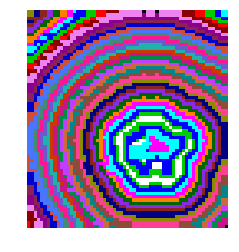

In [18]:
interact(display_with_overlay, 
         slice_number = (0, reference_segmentation .GetSize()[1]-1), image = fixed(reference_segmentation),
         segs = fixed(imgFiltered), window_min = fixed(-1024), window_max=fixed(976));